# Data Analysis_Part A_An example from the car Industry

This is an analysis based to the methodology of IBM course.

We will perform data cleaning and wrangling so that we can move to next steps, later on.

In [97]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
import scipy as sp
import ipywidgets
import tqdm

## STEP #1 - Data Wrangling

We import our dataframe and see the first rows

In [98]:
df= pd.read_csv("auto.csv")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We notice that the headers are missing so we look our documentation and pass the proper headers

In [99]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [100]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# STEP #2 - Data cleaning / Data preprocessing


### 2.1. Dealing with missing values

We need to replace the "?" symbol with NaN so the dropna() can remove the missing values

In [101]:
df = df.replace("?", np.NaN)
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We need to evaluate how many data we miss and where in the dataframe. 

In [102]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    204
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      40
Name: count, dtype: int64

make
make
False    204
Name: count, dtype: int64

fuel-type
fuel-type
False    204
Name: count, dtype: int64

aspiration
aspiration
False    204
Name: count, dtype: int64

num-of-doors
num-of-doors
False    202
True       2
Name: count, dtype: int64

body-style
body-style
False    204
Name: count, dtype: int64

drive-wheels
drive-wheels
False    204
Name: count, dtype: int64

engine-location
engine-location
False    204
Name: count, dtype: int64

wheel-base
wheel-base
False    204
Name: count, dtype: int64

length
length
False    204
Name: count, dtype: int64

width
width
False    204
Name: count, dtype: int64

height
height
False    204
Name: count, dtype: int64

curb-weight
curb-weight
False    204
Name: count, dtype: int64

engine-type
engine-type
False    204
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    204
Nam

So we identify those missing data:

- "normalized-losses": 36 missing data
- "num-of-doors": 2 missing data
- "bore": 4 missing data
- "stroke" : 4 missing data
- "horsepower": 2 missing data
- "peak-rpm": 2 missing data
- "price": 4 missing data

In order to ignore an entrire row, we need to have the most values missing. There is no such thing in our case so we better fill the rows with some estimations. 
In the case of "normalized-losses", "stroke", "bore", "horsepower", "peak-rpm", we will replace with the mean.
In the case of "num-of-doors", we will replace with the most frequent number.

We will first calculate the mean of each column and then replace it in the NaN.

In [104]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [105]:
df["normalized-losses"].replace(np.NaN, avg_norm_loss, inplace = True)

In [106]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average bore:", avg_bore)

Average bore: 3.3290499999999996


In [107]:
df["bore"].replace(np.NaN, avg_bore, inplace = True)

In [108]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.2582999999999993


In [109]:
df["stroke"].replace(np.NaN, avg_bore, inplace = True)

In [110]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.22277227722772


In [111]:
df["horsepower"].replace(np.NaN, avg_bore, inplace = True)

In [112]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.990099009901


In [113]:
df['peak-rpm'].replace(np.NaN, avg_peakrpm, inplace=True)

In [114]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

In [115]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [116]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Regarding the missing values in "price", we better drop them as we will focus on car prices and we will also perform linear regression in the nest steps.

In [117]:
df.dropna(subset = ['price'], axis = 0)
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [118]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### 2.2. Data formating

At this point we will see closely what type of data we have and we will perform the needed changes (if needed).

In [120]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Let's also see the statistical summary of our data.

In [121]:
df.describe()
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.0,204,204,204,204,204,204,204,204.000000,...,204.000000,204,204,204,204.000000,204,204,204.000000,204.000000,200
unique,NaN,52.0,22,2,2,2,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,185
top,NaN,122.0,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,16500
freq,NaN,40.0,32,184,167,116,96,120,201,NaN,...,NaN,93,23,20,NaN,19,37,NaN,NaN,2
mean,0.823529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.806373,...,126.892157,NaN,NaN,NaN,10.148137,NaN,NaN,25.240196,30.769608,NaN
std,1.239035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.994144,...,41.744569,NaN,NaN,NaN,3.981000,NaN,NaN,6.551513,6.898337,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.575000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,119.500000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,142.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.500000,NaN


In [122]:
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,204.000000,204.000000
mean,174.075000,10.148137
std,12.362123,3.981000
min,141.100000,7.000000
25%,166.300000,8.575000
50%,173.200000,9.000000
75%,183.200000,9.400000
max,208.100000,23.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

Let's convert our data to the right types

In [124]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

### 2.3. Data standarazation

In Greece we count distance in km and not in miles. So, to have a better understanding of the data, let's turn the miles into km.

In [125]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


In [126]:
df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [127]:
df["highway-mpg"] = 235/df["highway-mpg"]

In [128]:
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421


### 2.4. Data normalization


We will make a scale for the columns "length", "width" and "height".

In [129]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

In [130]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.822681,0.905947,0.876254
2,0.848630,0.915629,0.908027
3,0.848630,0.918396,0.908027
4,0.851994,0.917012,0.887960


### 2.5. Binning

We will transform the variables that are numerical and continious into discrete categories for grouping analysis.

In [131]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

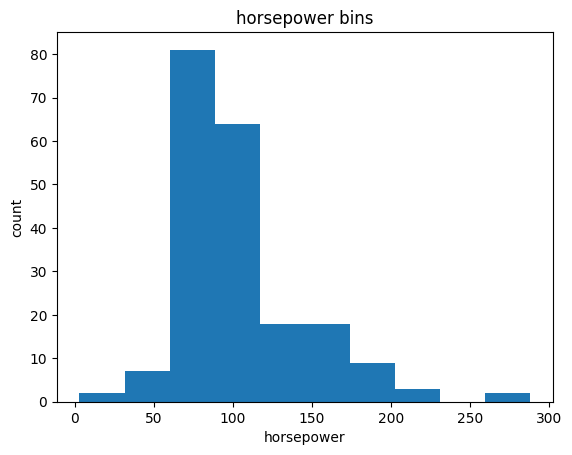

In [132]:
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [133]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([  3.,  98., 193., 288.])

In [134]:
group_names = ['Low', 'Medium', 'High']

In [135]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Medium
1,154,Medium
2,102,Medium
3,115,Medium
4,110,Medium
5,110,Medium
6,110,Medium
7,140,Medium
8,160,Medium
9,101,Medium


In [136]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       111
Medium     87
High        6
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

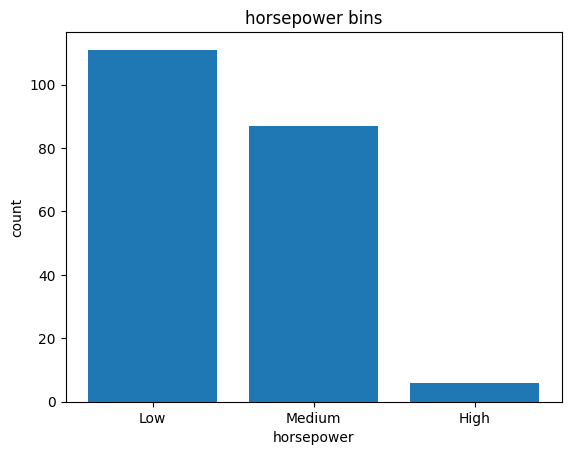

In [137]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

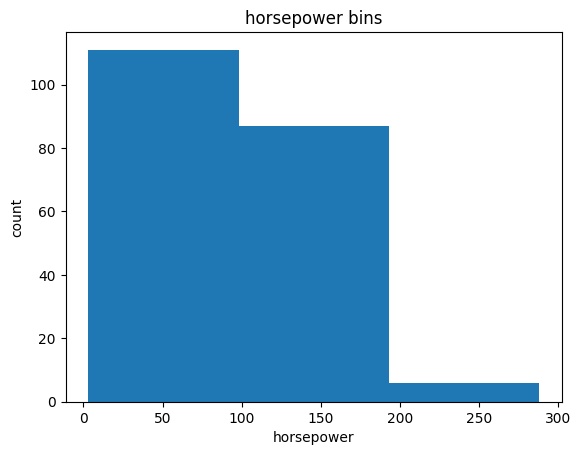

In [138]:
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### 2.6. Dummy Variable

Those indicators are useful for regression analysis that we will do in later steps.

In [139]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [140]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [141]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Medium,False,True
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Medium,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Medium,False,True
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,9.400000,15250.0,12.368421,Medium,False,True


In [143]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [144]:
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [145]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,16500.0,11.190476,Medium,False,True,True,False
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,7.833333,13950.0,9.791667,Medium,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,10.681818,17450.0,13.055556,Medium,False,True,True,False
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.917012,...,5500.0,19,9.400000,15250.0,12.368421,Medium,False,True,True,False


Let's save the first cleaning we did so that we can continue any time.

In [147]:
df.to_csv("automobile.csv", index=False)